# Ampel

Ein Kraftfahrzeug nähert sich einer Verkehrsampel mit verminderter Geschwindigkeit. Beim Umschalten der Ampel auf Grün wird das KFZ während der Zeit $t_{1}$ gleichmäßig mit $a$ beschleunigt und legt dabei die Wegstrecke $s_{1}$ zurück.
Wie groß sind die Geschwindigkeiten $v_{0}$ und $v_{1}$ am Anfang und am Ende der Beschleunigungsphase?

Gegeben:

- Beschleunigung $a = 0,94~\frac{m}{s²}$
- Zeit $t_{1} = 5,3~s$
- Wegstrecke $s_{1} = 60~m$

Gesucht:

Geschwindigkeit in Metern pro Sekunde [$\frac{m}{s}$] 
1. $v_{0}$
2. $v_{1}$

Skizze: 

![title](Skizzen/ampel_RB.svg)

Zuerst müssen einige Biobliotheken importiert werden, die für Berechnungen, Visualisierung, etc. notwendig sind.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Für die Berechnung von $v_{0}$ und $v_{1}$ benötigen wir das Weg-Zeit-Gesetzt für die gleichförmig beschleunigte Bewegung:

$ s(t) = \frac{a}{2} \cdot{} t^2 + v_0 \cdot{} t + s_0$ | $s_0 = 0$

$ s_1(t) = \frac{a}{2} \cdot{} t_{1}^2 + v_0 \cdot{} t_1 $

Dadurch ergeben sich für $v_{0}$ und $v_{1}$ folgende Formeln: 

$ v_{0} = \frac{s_{1}}{t_{1}} -\frac{a}{2} \cdot{}t_{1}$

$ v(t) = a \cdot{} t + v_{0}$

$ v_1(t) = a \cdot{} t + \frac{s_{1}}{t_{1}} -\frac{a}{2} \cdot{}t_{1}$

Nun können wir für die oben gezeigten Formeln durch Python Funktionen definieren, mit denen wir im Anschluss die Ergebnisse für z.B. $v_0$ und $v_1$ berechnen können.

In [2]:
# Funktion zur Berechnung von v0
def berechne_v0(a, t, s):
    return (s/t) - (0.5*a*t)

# Funktion zur Berechnung von v1
def berechne_v1(a, t, s):
    return (a * t) + (s/t) - (0.5*a*t)

# allgemeine Funktion zur Berechnung der Geschwindigkeit v
def berechne_v(a,t, v0):
    return (a * t) + v0

# allgemeine Funktion zur Berechnung des Weges s
def berechne_s(v0, t, a):
    return (v0 * t) + ((a/2) * t**2)

Nachdem die Formeln definiert wurden, können wir nun die gegebenen Werte als Variablen definieren und diese der Funktion übergeben.

In [3]:
# Variablen definieren
a = 0.94 # m/s²
t = 5.3  # s
s = 60   # m

# Funktionsaufruf zur Berechnung von v0
v0 = berechne_v0(a, t, s)
#Ausgabe des Ergebnisses
print(f"v0 = {round(v0,3)} m/s")

#Funktionsaufruf zur Berechnung von v1 ohne v0 zu kennen.
v1 = berechne_v1(a, t, s)
print(f"v1 = {round(v1,3)} m/s (ohne v0)")

#Funktionsaufruf zur Berechnung von v1 mithilfe des zuvor bestimmten v0.
v1 = berechne_v(a, t, v0)
print(f"v1 = {round(v1,3)} m/s (mit v0)")

v0 = 8.83 m/s
v1 = 13.812 m/s (ohne v0)
v1 = 13.812 m/s (mit v0)


Rechenweg und Ergebnisse: 

Berechnung $v_0$:

$v_{0}(t_{1}) = \frac{60~m}{5,3~s} - \frac{1}{2}\cdot 0,94 \frac{m}{s^2} \cdot 5,3~s  = 8,83~\frac{m}{s}  ≈ 32~\frac{km}{h}$

Berechnung v mit $v_0$:

$v_{1}(t_{1}) = 0,94 \frac{m}{s^2} \cdot 5,3~s+ 8,83~\frac{m}{s^2} = 13,81~\frac{m}{s} ≈ 50~\frac{km}{h}$

Berechnung v ohne $v_0$:

$v_{1}(t_{1}) = 0,94 \frac{m}{s^2} \cdot 5,3~s + \frac{60~m}{5,3~s} - \frac{1}{2} \cdot 0,94 \frac{m}{s^2} \cdot 5,3~s = 13,81~\frac{m}{s} ≈ 50~\frac{km}{h}$

Nun können wir die Zusammenhänge der gleichmäßig beschleunigten Bewegung für die gegeben Parameter visualisieren. Hierfür werden für definierte Zeitschritt die Beschleunigung, die Geschwindigkeit und zurückgelegte Wegstrecke abhängig von t bestimmt.

Der folgende Code berechnet Beschleunigung, Geschwindigkeit und Weg für die gegeben Werte: 

Beschleunigung $a = 0,94~\frac{m}{s²}$

benötigte Zeit $t = 5,3~s$

zurückgelegter Weg $s = 60~m$

In [4]:
# Definition der Startparameter

a0 = 0.94 # m/s^2
weg = 60 # m

# Hier definieren wir einen Beobachtungszeitraum, der die über die 5.3s hinaus geht und defineiren dabei automatisch t0 und t1.
zeitschritte = np.arange(0,t*2,0.1).round(1)
t1 = round((t*2) - (t/2),1)
t0 = round(t/2, 1)

# Nun definieren wir eine Tabelle in der wir die gemessenen Werte erfassen.
Messwerte = []

# Initialisieren der variablen und brechnung von v0.
v0 = berechne_v0(a0, t, weg)
s = 0
a = 0
for t in zeitschritte:
    # da nur zwischen t0 und t1 beschleunigt wird, ist die Bescheligung 
    # nur zwischen t0 und t1 gleich der gegebenen Beschleunigung und ansonsten 0.
    if (t >= t0) and (t <= t1):
        a = a0
        v0 = berechne_v(a,0.1,v0) # 0.1 ist Δt
        s = s + berechne_s(v0,0.1,a) # s in Δs
        Messwerte.append([t, a, v0, s]) # Hier fügen wir die aktuelle Beobachtung unseren Messwerten hinzu
    else:
        a = 0 # außerhalb von t0 und t1 wird nicht beschleunigt.
        s = s + berechne_s(v0,0.1,a)
        Messwerte.append([t, a, v0, s])
        
#Als letztes werden die Messwerte in ein Pandas DataFrame konvertiert. Das macht die Visualisierung einfacher.
Tabelle = pd.DataFrame(Messwerte, columns=['time', 'a', 'v', 's'])   
Tabelle.head()

,time,a,v,s
0,0.0,0.0,8.829755,0.882975
1,0.1,0.0,8.829755,1.765951
2,0.2,0.0,8.829755,2.648926
3,0.3,0.0,8.829755,3.531902
4,0.4,0.0,8.829755,4.414877


Nun können wir Beschleunigung, Geschwindigkeit und Wegstrecke in Abhängigkeit von der Zeit graphisch darstellen:

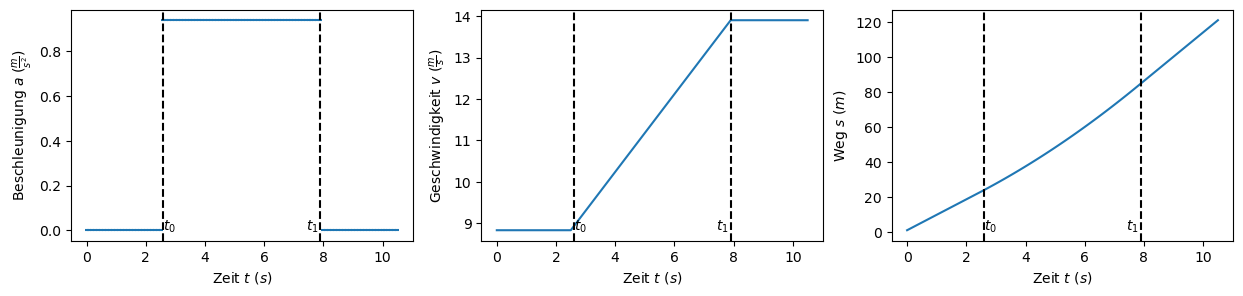

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15,3))
# Zeichnen der Verläufe
axs[0].scatter(Tabelle['time'], Tabelle['a'], s=10, marker="_")
axs[1].plot(Tabelle['time'], Tabelle['v'], linestyle="-")
axs[2].plot(Tabelle['time'], Tabelle['s'], linestyle="-")

# Einstellungen des Plots
axs[0].set_ylabel(r"Beschleunigung $\mathit{a}$ ($\frac{m}{s^2}$)")
axs[0].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[0].axvline(x=t0, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[0].axvline(x=t1, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[0].text(t0,min(Tabelle['a']),r"$t_0$")
axs[0].text(t1-0.5,min(Tabelle['a']),r"$t_1$")
axs[1].set_ylabel(r"Geschwindigkeit $\mathit{v}$ ($\frac{m}{s}$)")
axs[1].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[1].axvline(x=t0, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[1].axvline(x=t1, ymin=0, ymax=14, color='#000000', linestyle='--')
axs[1].text(t0,min(Tabelle['v']),r"$t_0$")
axs[1].text(t1-0.5,min(Tabelle['v']),r"$t_1$")
axs[2].set_ylabel(r"Weg $\mathit{s}$ ($m$)")
axs[2].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[2].axvline(x=t0, ymin=0, ymax=120, color='#000000',linestyle='--')
axs[2].axvline(x=t1, ymin=0, ymax=120, color='#000000',linestyle='--')
axs[2].text(t0,min(Tabelle['s']),r"$t_0$")
axs[2].text(t1-0.5,min(Tabelle['s']),r"$t_1$") 
plt.show()

Der Vorteil einer Programmiersprache wie Python ist es, dass wir nun die gegebenen Werte verändern oder auch die Geschwindigkeiten für mehrere Startparameter berechnen können. Im folgendem Beispiel werden verschiedene Beschleunigungen gegeben und dabei die Geschwindigkeiten sowie die zurückgelegten Wegstrecken bestimmt.

Als erstes sollten wir die verschiedenen Beschleunigungen definieren.

In [6]:
# Definition verschiedener Beschleunigungen von 0.94 - 100 
a0_vektor = [0.94, 1.94, 2.94, 3.94]
# Der Zurückgelgte Weg und die zeit sollen gleich bleiben
weg = 60 # m
t_gesamt = 5.3 #s
# Anhand der Zeit ergeben sich auch wieder t0 und t1
zeitschritte = np.arange(0,t_gesamt*2,0.1).round(1)
t1 = round((t_gesamt*2) - (t_gesamt/2),1)
t0 = round(t_gesamt/2, 1)

Jetzt können in einer Schleife für verschiedene Beschleunigungen $a$ alle Geschwindigkeiten $v$ und Wegstrecken $s$ in Abhängigkeit von der Zeit bestimmt werden: 

In [7]:
# Wir definieren wieder eine Messwerttabelle

Messwerte= []

# Jetzt wird durch die iteration des a0_vektors für alle a_0 die Geschwindigkeit, Weg und v0 berechnet.
for a0_i in a0_vektor:
    v0 = berechne_v0(a0_i, t_gesamt, weg)
    s = 0
    a = 0
    for t in zeitschritte:
        if (t >= t0) and (t <= t1):
            a = a0_i
            v0 = berechne_v(a,0.1,v0)
            s = s + berechne_s(v0,0.1,a)
            Messwerte.append([t, a, v0, s, a0_i])
        else:
            a = 0
            s = s + berechne_s(v0,0.1,a)
            Messwerte.append([t, a, v0, s, a0_i])

Tabelle2 = pd.DataFrame(Messwerte, columns=['time', 'a', 'v', 's', 'a0_i'])

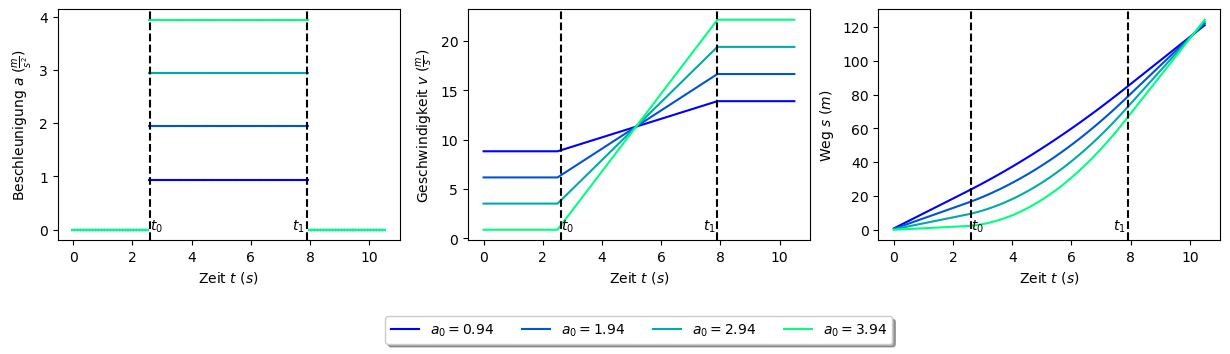

In [8]:
groups = Tabelle2.groupby("a0_i") # Für die Visualsierung werden nun die verschiedenen Messungen bei unterschiedlichen a0 anhand von a0 Gruppiert

# Definition einer Farbpalette 
col_pal = plt.get_cmap('winter', len(a0_vektor))
# Initialisieren einer Zählvariable
i = -1


fig, axs = plt.subplots(1, 3, figsize=(15,3))
# Iteration der a0 Gruppen und anschließende Visualsierung der Zeitverläufe
for name, group in groups:
    i = i+1
    axs[0].scatter(group['time'], group['a'], s=10, marker="_", color=col_pal(i))
    axs[1].plot(group['time'], group['v'], linestyle="-", color=col_pal(i), label = f"$a_0 = ${name}")
    axs[2].plot(group['time'], group['s'], linestyle="-", color=col_pal(i))
    
axs[0].set_ylabel(r"Beschleunigung $\mathit{a}$ ($\frac{m}{s^2}$)")
axs[0].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[0].axvline(x=t0, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[0].axvline(x=t1, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[0].text(t0,min(Tabelle2['a']),r"$t_0$")
axs[0].text(t1-0.5,min(Tabelle2['a']),r"$t_1$")
axs[1].set_ylabel(r"Geschwindigkeit $\mathit{v}$ ($\frac{m}{s}$)")
axs[1].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[1].axvline(x=t0, ymin=0, ymax=1, color='#000000', linestyle='--')
axs[1].axvline(x=t1, ymin=0, ymax=14, color='#000000', linestyle='--')
axs[1].text(t0,min(Tabelle2['v']),r"$t_0$")
axs[1].text(t1-0.5,min(Tabelle2['v']),r"$t_1$")
axs[2].set_ylabel(r"Weg $\mathit{s}$ ($m$)")
axs[2].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[2].axvline(x=t0, ymin=0, ymax=120, color='#000000',linestyle='--')
axs[2].axvline(x=t1, ymin=0, ymax=120, color='#000000',linestyle='--')
axs[2].text(t0,min(Tabelle2['s']),r"$t_0$")
axs[2].text(t1-0.5,min(Tabelle2['s']),r"$t_1$") 
#axs[1].legend(frameon=False, handlelength=0.75, fontsize='large', facecolor='#ffffff') 
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=len(a0_vektor))
plt.show()